# What is a Time Series?
A time series is any dataset where values are measured at different points in time. Time
series data is fundamental in many domains including finance, weather forecasting, sales analysis,
engineering, public health, and scientific research.

# 2. Time Series Data Structures in Pandas
### 2.1 Timestamp: Representing a Single Point in Time

A Timestamp represents a single moment in time. The <b>pd.to datetime()</b> function converts <b>strings
to Timestamps</b> and automatically infers the date format.

In [26]:
# Creating Timestamps from strings
import pandas as pd

# Automatically inferred format
#pd.to_datetime("2018-01-15 3:45pm")
# Output : Timestamp (’2018-01-15 15:45:00’)

# Ambiguous dates need clarification
#pd.to_datetime("7/8/1952")
# Output : Timestamp (’1952-07-08 00:00:00’) # July 8 , 1952

# Use dayfirst parameter for non -US format
pd.to_datetime("7/8/1952" , dayfirst=True) # DD/MM/YEAR
# Output : Timestamp (’1952-08-07 00:00:00’) # August 7 , 1952

Timestamp('1952-08-07 00:00:00')

### 2.2 DatetimeIndex: Representing Multiple Time Points
When to datetime() receives a list or array of date strings, it returns a DatetimeIndex—the core
data structure for time series analysis in pandas.

In [27]:
# Create DatetimeIndex from list of date strings
dates = pd.to_datetime([ "2018-01-05", "7/8/1952", "Oct 10, 1995"])
print (dates)
print(dates[0])
# DatetimeIndex ([’2018-01-05’, ’1952-07-08’, ’1995-10-10’],
# dtype = ’ datetime64 [ns]’, freq = None )

# The dtype ’datetime64 [ns] ’ indicates :
# - 64- bit integers store the underlying data
# - ’ns ’ = nanosecond precision (9 decimal places for seconds )

DatetimeIndex(['2018-01-05', '1952-07-08', '1995-10-10'], dtype='datetime64[ns]', freq=None)
2018-01-05 00:00:00


### Performance Optimization with Explicit Formats
For large datasets, specifying the date format explicitly can dramatically speed up parsing (up to
50x faster).

In [28]:
# Performance improvement with explicit format

# Without format specification ( slow for large data )
dates = pd.to_datetime([ "2/25/10" , "8/6/17", "12/15/12"])
print(dates)
# With explicit format ( much faster !)
dates = pd.to_datetime([ "2/25/10", "8/6/17", "12/15/12"] , format ="%m/%d/%y")
# Output : DatetimeIndex ([’2010-02-25’, ’2017-08-06’, ’2012-12-15’],
# dtype = ’ datetime64 [ns]’, freq = None )
print(dates)


DatetimeIndex(['2010-02-25', '2017-08-06', '2012-12-15'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2010-02-25', '2017-08-06', '2012-12-15'], dtype='datetime64[ns]', freq=None)


# 3 Creating Time Series DataFrames
### 3.1 Loading Time Series Data
When loading data from CSV files, date columns are <b>initially loaded as strings (object dtype)</b>. We
must convert them to proper datetime types

# Real-World Dataset: Open Power System Data (OPSD)
Daily electricity data from Germany (2006-2017):

• <b>Consumption:</b> Daily electricity consumption (GWh)

• <b>Wind:</b> Daily wind power production (GWh)

• <b>Solar:</b> Daily solar power production (GWh)

• <b>Wind+Solar:</b> Combined renewable production (GWh)

This dataset contains 4,383 daily observations covering 12 years of data, making it ideal for
exploring seasonality, trends, and patterns in time series analysis.

In [8]:
# Loading OPSD data using the CSV file
opsd_daily = pd.read_csv("opsd_germany_daily.csv")

# Check shape and data types
print (opsd_daily.shape) # (4383, 5) - 4383 rows , 5 columns
print (opsd_daily.dtypes)
# Date object <-- needs conversion !
# Consumption float64
# Wind float64
# Solar float64
# Wind + Solar float64

(4383, 5)
Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object


### 3.2 Method 1: Using parse dates and index col Parameters
This is the most efficient approach as it <b>converts and sets the index in a single operation</b>.

In [6]:
# Best practice : do everything during loading
opsd_daily = pd.read_csv("opsd_germany_daily.csv",index_col=0, # Column 0 becomes index
parse_dates=True) # Parse as datetime

# Verify the DatetimeIndex
print ( type (opsd_daily.index))
print (opsd_daily.head(3))
# uses the first column as the index, and automatically converts that index into datetime format.

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
            Consumption  Wind  Solar  Wind+Solar
Date                                            
2006-01-01     1069.184   NaN    NaN         NaN
2006-01-02     1380.521   NaN    NaN         NaN
2006-01-03     1442.533   NaN    NaN         NaN


### 3.3 Method 2: Two-Step Approach
If the date column cannot be parsed during loading, convert it afterwards.


In [12]:
# Step 1: Load data normally
df = pd.read_csv("opsd_germany_daily.csv")

# Step 2: Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"])
print(df["Date"])
# Step 3: Set as index
df.set_index("Date", inplace=True)

0      2006-01-01
1      2006-01-02
2      2006-01-03
3      2006-01-04
4      2006-01-05
          ...    
4378   2017-12-27
4379   2017-12-28
4380   2017-12-29
4381   2017-12-30
4382   2017-12-31
Name: Date, Length: 4383, dtype: datetime64[ns]


### 3.4 Accessing DateTime Components
Once you have a DatetimeIndex, you can easily access individual date components

In [31]:
# Extracting datetime components

# Add columns with year , month , and day of week
opsd_daily["Y"] = opsd_daily.index.year
opsd_daily["M"] = opsd_daily.index.month
opsd_daily["W "] = opsd_daily.index.day_name()

# Other useful attributes
#opsd_daily.index.day # Day of month (1-31)
#opsd_daily.index.dayofweek # 0= Monday , 6= Sunday
#opsd_daily.index.quarter # Quarter (1-4)
opsd_daily.index.week # Week of year (1-52)

/tmp/ipykernel_3743/2990974910.py:12: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  opsd_daily.index.week # Week of year (1-52)


Int64Index([52,  1,  1,  1,  1,  1,  1,  1,  2,  2,
            ...
            51, 51, 51, 52, 52, 52, 52, 52, 52, 52],
           dtype='int64', name='Date', length=4383)

# 4 Time-Based Indexing and Slicing
### 4.1 The Power of DatetimeIndex
With a <b>DatetimeIndex</b>, you can use <b>date strings to select data intuitively, without complex boolean
conditions</b>. This is one of pandas’ most powerful features for time series work.

### 4.2 Selecting a Single Day


In [32]:
# Selecting data for a single day
# Select data for August 10, 2017
opsd_daily.loc["2017-08-10"]

Consumption     1351.491
Wind             100.274
Solar              71.16
Wind+Solar       171.434
Year                2017
Month                  8
Weekday         Thursday
Weekday Name    Thursday
Y                   2017
M                      8
W               Thursday
Name: 2017-08-10 00:00:00, dtype: object

### 4.3 Selecting a Date Range

In [33]:
# Selecting a date range (inclusive on both ends)
# Select data from Jan 20 to Jan 22, 2014
opsd_daily.loc["2014-01-20":"2014-01-22"]

# Note : Both endpoints are INCLUSIVE
# This differs from Python slicing which excludes the end point

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday,Weekday Name,Y,M,W
Date,,,,,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,Monday,Monday,2014,1,Monday
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,Tuesday,Tuesday,2014,1,Tuesday
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,Wednesday,Wednesday,2014,1,Wednesday


### Partial String Indexing
One of the most powerful <b>features of DatetimeIndex is partial-string indexing</b>, which allows you
to <b> select entire time periods by specifying only part of the date string</b>.


In [34]:
# Select entire year 2006
opsd_daily.loc["2006"]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday,Weekday Name,Y,M,W
Date,,,,,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,Sunday,Sunday,2006,1,Sunday
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,Monday,Monday,2006,1,Monday
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,Tuesday,Tuesday,2006,1,Tuesday
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,Wednesday,Wednesday,2006,1,Wednesday
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,Thursday,Thursday,2006,1,Thursday
...,...,...,...,...,...,...,...,...,...,...,...
2006-12-27,1284.676,NaN,NaN,NaN,2006,12,Wednesday,Wednesday,2006,12,Wednesday
2006-12-28,1314.603,NaN,NaN,NaN,2006,12,Thursday,Thursday,2006,12,Thursday
2006-12-29,1274.646,NaN,NaN,NaN,2006,12,Friday,Friday,2006,12,Friday


In [19]:
# Select entire month ( February 2012)
opsd_daily.loc["2012-02"]


,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,Wednesday
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,Thursday
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,Friday
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,Saturday
2012-02-05,1279.432,55.522,54.572,110.094,2012,2,Sunday
2012-02-06,1574.766,34.896,55.389,90.285,2012,2,Monday
2012-02-07,1615.078,100.312,19.867,120.179,2012,2,Tuesday
2012-02-08,1613.774,93.763,36.930,130.693,2012,2,Wednesday
2012-02-09,1591.532,132.219,19.042,151.261,2012,2,Thursday


In [20]:
# Select entire quarter (Q1 of 2015)
opsd_daily.loc["2015-Q1"]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2015-01-01,1111.336,325.128,17.079,342.207,2015,1,Thursday
2015-01-02,1300.884,603.558,7.758,611.316,2015,1,Friday
2015-01-03,1265.271,462.953,7.236,470.189,2015,1,Saturday
2015-01-04,1198.854,385.024,19.984,405.008,2015,1,Sunday
2015-01-05,1449.861,216.543,26.524,243.067,2015,1,Monday
...,...,...,...,...,...,...,...
2015-03-27,1499.701,219.296,76.244,295.540,2015,3,Friday
2015-03-28,1274.136,214.583,115.420,330.003,2015,3,Saturday
2015-03-29,1187.673,521.684,37.867,559.551,2015,3,Sunday


In [21]:
# Select date range by year
opsd_daily.loc["2015":"2017"]


,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2015-01-01,1111.33600,325.128,17.079,342.207,2015,1,Thursday
2015-01-02,1300.88400,603.558,7.758,611.316,2015,1,Friday
2015-01-03,1265.27100,462.953,7.236,470.189,2015,1,Saturday
2015-01-04,1198.85400,385.024,19.984,405.008,2015,1,Sunday
2015-01-05,1449.86100,216.543,26.524,243.067,2015,1,Monday
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,Wednesday
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,Thursday
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,Friday


In [22]:
# Select range by month
opsd_daily.loc["2015-01":"2015-06"]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2015-01-01,1111.336,325.128,17.079,342.207,2015,1,Thursday
2015-01-02,1300.884,603.558,7.758,611.316,2015,1,Friday
2015-01-03,1265.271,462.953,7.236,470.189,2015,1,Saturday
2015-01-04,1198.854,385.024,19.984,405.008,2015,1,Sunday
2015-01-05,1449.861,216.543,26.524,243.067,2015,1,Monday
...,...,...,...,...,...,...,...
2015-06-26,1394.149,31.867,157.912,189.779,2015,6,Friday
2015-06-27,1175.912,166.768,112.506,279.274,2015,6,Saturday
2015-06-28,1064.642,63.403,186.140,249.543,2015,6,Sunday


### 4.5 Advantages Over Traditional Indexing
Traditional approach (verbose and error-prone):


In [25]:
mask = (opsd_daily.index >= "2014-01-20")& (opsd_daily.index <= "2014-01-22")
result = opsd_daily[mask]
print(result)

            Consumption    Wind   Solar  Wind+Solar  Year  Month Weekday Name
Date                                                                         
2014-01-20     1590.687  78.647   6.371      85.018  2014      1       Monday
2014-01-21     1624.806  15.643   5.835      21.478  2014      1      Tuesday
2014-01-22     1625.155  60.259  11.992      72.251  2014      1    Wednesday


In [26]:
# DatetimeIndex approach (clean and intuitive):
result = opsd_daily.loc["2014-01-20":"2014-01-22"]
print(result)

            Consumption    Wind   Solar  Wind+Solar  Year  Month Weekday Name
Date                                                                         
2014-01-20     1590.687  78.647   6.371      85.018  2014      1       Monday
2014-01-21     1624.806  15.643   5.835      21.478  2014      1      Tuesday
2014-01-22     1625.155  60.259  11.992      72.251  2014      1    Wednesday


# 5 Visualizing Time Series Data
### 5.1 Setup for Time Series Visualization

In [35]:
# : Import and configure visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Use seaborn styling
sns.set (rc={"figure.figsize": (11, 4)}) # rc means runtime configuration : figure size, fonts, style 

### 5.2 Basic Time Series Plot

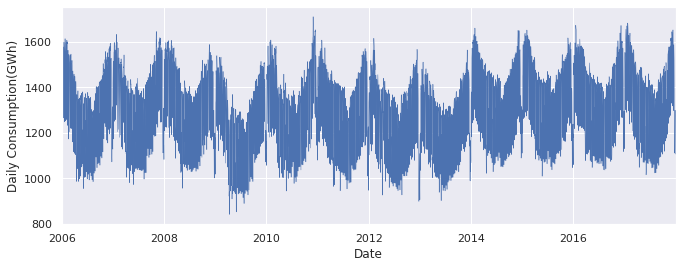

In [36]:
# Plot daily electricity consumption ( full 12 years )
opsd_daily["Consumption"].plot(linewidth =0.5)
plt.ylabel("Daily Consumption(GWh)")
plt.show()

### Key observations from the full time series plot:
• Clear yearly seasonality (higher in winter, lower in summer)

• Consistent consumption levels across the 12-year period

• No obvious long-term upward or downward trend

### 5.3 Scatter Plot for High-Frequency Data
For dense time series with many data points, scatter plots can be more readable than lines.

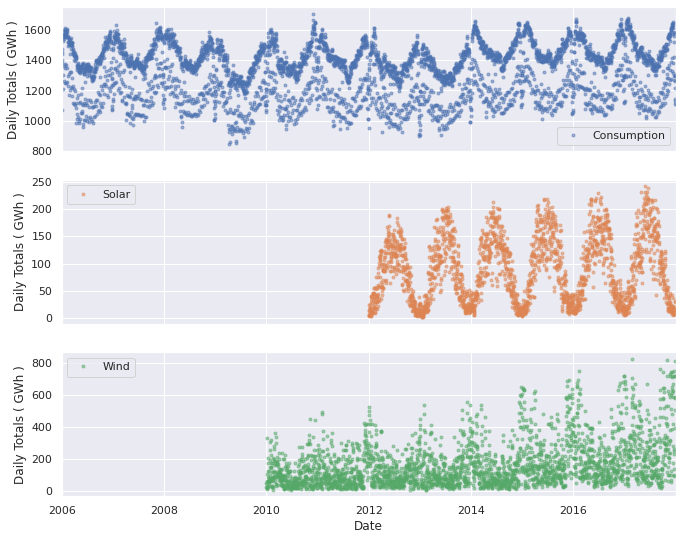

In [37]:
# Plot three time series as subplots
# Scatter plot with subplots

cols_plot = ["Consumption","Solar","Wind"]
axes = opsd_daily[cols_plot].plot(
marker=".",
alpha=0.5,
linestyle="None",
figsize=(11, 9),
subplots=True
)

for ax in axes:
    ax.set_ylabel("Daily Totals ( GWh )")
plt.show()

### 5.4 Zooming into Specific Time Periods

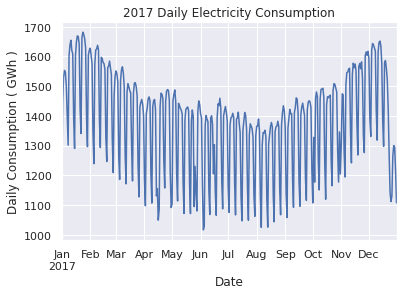

In [43]:
# Plotting a single year for detail
# Plot just 2017 to see more detail
ax = opsd_daily.loc["2017", "Consumption"].plot()
ax.set_ylabel("Daily Consumption ( GWh )")
ax.set_title("2017 Daily Electricity Consumption")
plt.show()

### 5.5 Further Zoom: Monthly Detail


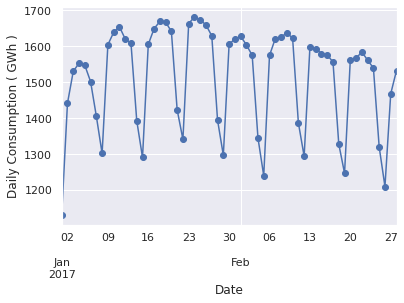

In [44]:
# Plotting January and February for weekly patterns
# Plot Jan - Feb 2017 to see weekly oscillations
ax = opsd_daily.loc["2017-01":"2017-02", "Consumption"].plot(
marker="o",
linestyle="-"
)
ax.set_ylabel("Daily Consumption ( GWh )")
plt.show()

# Clear observation : Consumption is higher on weekdays ( peaks )
# and lower on weekends ( troughs )


### 5.6 Customizing Time Series Plots with matplotlib.dates
For precise control over tick marks and labels, use matplotlib.dates.

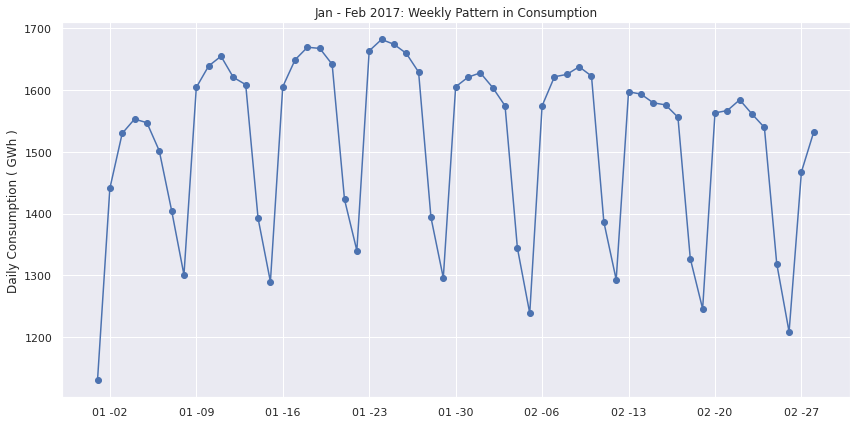

In [45]:
# Professional plot with weekly gridlines
import matplotlib.dates as mdates

fig , ax = plt.subplots(figsize=(12, 6))

# Plot the data
ax.plot(opsd_daily.loc["2017-01":"2017-02", "Consumption"] ,
marker="o", linestyle= "-")

# Set x- axis major ticks to every Monday
ax.xaxis.set_major_locator(mdates.WeekdayLocator(
byweekday=mdates.MONDAY
) )

# Format tick labels as month / day
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m -%d") )

ax.set_ylabel("Daily Consumption ( GWh )")
ax.set_title("Jan - Feb 2017: Weekly Pattern in Consumption")

plt.tight_layout()
plt.show()


# Seasonality Analysis
### 6.1 What is Seasonality?
Seasonality refers to repeating patterns that occur at regular time intervals. These patterns can
be:

• <b>Yearly:</b> Seasonal changes in weather (winter vs. summer)
    
• <b>Weekly:</b> Weekday vs. weekend patterns (work patterns)
    
• <b>Daily:</b> Morning peak vs. nighttime low (business hours)
    
• <b>Custom:</b> Holiday effects, lunar cycles, etc.
### 6.2 Identifying Seasonality with Box Plots
Box plots group data by time period and show the distribution for each period.

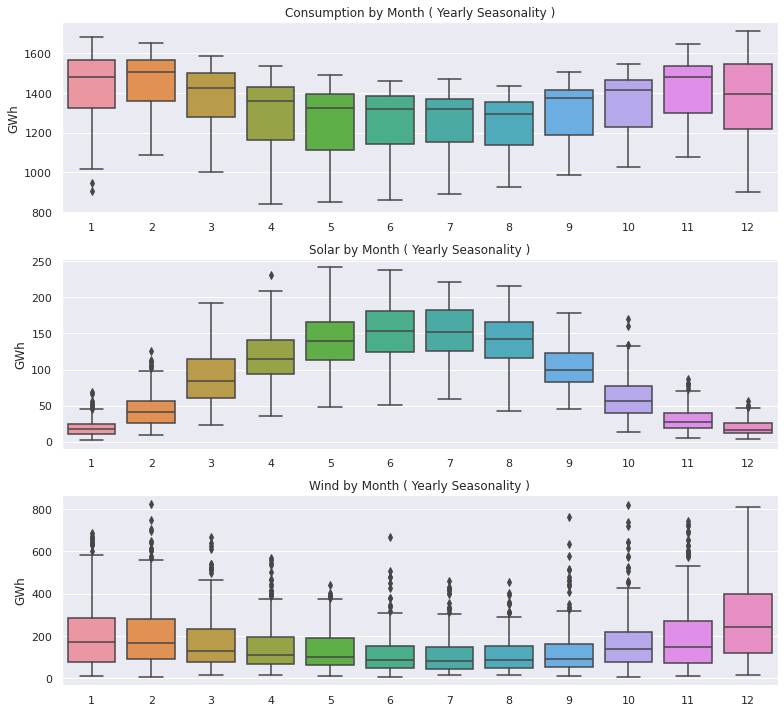

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

fig , axes = plt.subplots(3, 1, figsize=(11, 10))

for name , ax in zip (["Consumption", "Solar", "Wind"], axes):
    sns.boxplot(data=opsd_daily , x="Month", y=name , ax=ax)
    ax.set_ylabel("GWh")
    ax.set_title(f"{ name } by Month ( Yearly Seasonality )")
    ax.set_xlabel("")

plt.tight_layout()
plt.show()
# zip: it pairs elements from multiple sequences one-by-one

### Key findings:
• Electricity consumption is higher in winter (Dec, Jan, Feb) and lower in summer (June, July,
Aug)

• December and January show even lower consumption due to holiday effects

• Solar production peaks in summer (high sunlight)

• Wind production is more variable, with more extreme outliers (storms)

### 6.3 Weekly Seasonality: Day of Week Effects


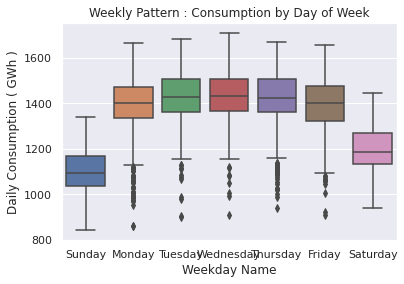

Weekday Name
Friday       1394.624076
Monday       1389.786334
Saturday     1200.549839
Sunday       1103.104493
Thursday     1421.158254
Tuesday      1428.277624
Wednesday    1433.606541
Name: Consumption, dtype: float64


In [50]:
# Weekly seasonality: Day of week analysis

sns.boxplot(data=opsd_daily ,
x ="Weekday Name",
y = "Consumption")
plt.ylabel("Daily Consumption ( GWh )")
plt.title("Weekly Pattern : Consumption by Day of Week")
plt.show()

# Compare means by day of week
daily_pattern = opsd_daily.groupby("Weekday Name") ["Consumption"].mean()
print (daily_pattern)

<b>Observation</b>: Consumption is significantly higher on weekdays (Monday-Friday) than on weekends (Saturday-Sunday) due to business and industrial activity.

# 7 Frequencies and DatetimeIndex Properties
### 7.1 What is Frequency?
When time series data is uniformly spaced (same interval between observations), we can assign a
frequency to the DatetimeIndex. This enables effcient time-based operations.
### 7.2 Creating Date Ranges with Specified Frequency
The pd.date range() function creates evenly-spaced sequences of dates.

In [39]:
# Creating daily and hourly date ranges
# Daily frequency (D) from March 10 to March 15, 1998
dates_daily = pd.date_range("1998-03-10", "1998-03-15", freq="D")
print(dates_daily)
# Output : [1998-03-10, 1998-03-11, ..., 1998-03-15]

# Hourly frequency (H) for 8 hours starting Sept 20, 2004
dates_hourly = pd.date_range("2004-09-20", periods=8, freq="H")
print(dates_hourly)
# Output : [2004-09-20 00:00, 2004-09-20 01:00, ..., 2004-09-20 07:00]


DatetimeIndex(['1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13',
               '1998-03-14', '1998-03-15'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2004-09-20 00:00:00', '2004-09-20 01:00:00',
               '2004-09-20 02:00:00', '2004-09-20 03:00:00',
               '2004-09-20 04:00:00', '2004-09-20 05:00:00',
               '2004-09-20 06:00:00', '2004-09-20 07:00:00'],
              dtype='datetime64[ns]', freq='H')


### 7.3 Common Frequency Codes
Code Meaning
<b>’H’</b> Hourly
<b>’D’ </b> Daily
<b>’B’ </b> Business day (Mon-Fri)
<b>’W’ </b> Weekly
<b>’M’ </b> Month-end
<b>’Q’ </b> Quarter-end
<b>’Y’</b> Year-end
You can also use multiples: ’5D’ for every 5 days, ’2H’ for every 2 hours, etc.
### 7.4 Checking and Setting Frequency

In [42]:
# Check if data has a frequency
# Checking and assigning frequency

print (opsd_daily.index.freq)
# Output : None ( data was loaded from CSV , not created with date_range )

# For data that should be daily but lacks frequency assignment
opsd_daily = opsd_daily.asfreq("D")
print(opsd_daily)

<Day>
            Consumption     Wind   Solar  Wind+Solar  Year  Month   Weekday   \
Date                                                                           
2006-01-01   1069.18400      NaN     NaN         NaN  2006      1     Sunday   
2006-01-02   1380.52100      NaN     NaN         NaN  2006      1     Monday   
2006-01-03   1442.53300      NaN     NaN         NaN  2006      1    Tuesday   
2006-01-04   1457.21700      NaN     NaN         NaN  2006      1  Wednesday   
2006-01-05   1477.13100      NaN     NaN         NaN  2006      1   Thursday   
...                 ...      ...     ...         ...   ...    ...        ...   
2017-12-27   1263.94091  394.507  16.530     411.037  2017     12  Wednesday   
2017-12-28   1299.86398  506.424  14.162     520.586  2017     12   Thursday   
2017-12-29   1295.08753  584.277  29.854     614.131  2017     12     Friday   
2017-12-30   1215.44897  721.247   7.467     728.714  2017     12   Saturday   
2017-12-31   1107.11488  721.176  

### 7.5 Handling Missing Dates with asfreq()
The <b>asfreq()</b> method is useful when you have gaps in your time series and want to either identify
them or fill them.

In [43]:
# Sample data with missing dates

times_sample = pd.to_datetime([ "2013-02-03", "2013-02-06", "2013-02-08"])
consum_sample = opsd_daily.loc[times_sample , ["Consumption"]].copy()
print(consum_sample)
# Convert to daily frequency without filling
consum_freq = consum_sample.asfreq("D")
print(consum_freq)
# Forward fill the missing values
consum_freq_filled = consum_sample.asfreq("D", method="ffill")

print (consum_freq_filled)

# Consumption
# 2013-02-03 1109.639
# 2013-02-04 NaN <-- gap revealed
# 2013-02-05 NaN <-- gap revealed
# 2013-02-06 1451.449
# 2013-02-07 NaN <-- gap revealed
# 2013-02-08 1433.098

            Consumption
Date                   
2013-02-03     1109.639
2013-02-06     1451.449
2013-02-08     1433.098
            Consumption
Date                   
2013-02-03     1109.639
2013-02-04          NaN
2013-02-05          NaN
2013-02-06     1451.449
2013-02-07          NaN
2013-02-08     1433.098
            Consumption
Date                   
2013-02-03     1109.639
2013-02-04     1109.639
2013-02-05     1109.639
2013-02-06     1451.449
2013-02-07     1451.449
2013-02-08     1433.098


# 8 Resampling: Changing Frequency
### 8.1 What is Resampling?
Resampling changes the frequency of time series data:

• <b>Downsampling:</b> Reduce frequency (e.g., daily → monthly). Usually involves aggregation.

• <b>Upsampling:</b> Increase frequency (e.g., daily → hourly). Usually involves interpolation.
### 8.2 Downsampling with Aggregation
The <b>resample()</b> method splits data into <b>time bins and applies an aggregation function.</b>

In [61]:
# Resampling daily data to weekly means

# Resample to weekly frequency , taking the mean
opsd_weekly_mean = opsd_daily[[ "Consumption", "Wind", "Solar"]].resample("W").mean()

# Resample to monthly frequency , taking the sum
opsd_monthly_sum = opsd_daily[[ "Consumption", "Wind", "Solar"]].resample("M") . sum ()

print (opsd_weekly_mean.head(3))

# Confirm the number of rows has decreased
print ( f" Daily : {len( opsd_daily )} rows ")
print ( f" Weekly : { len ( opsd_weekly_mean )} rows ")
# Output : Daily : 4383 rows , Weekly : 627 rows


            Consumption  Wind  Solar
Date                                
2006-01-01  1069.184000   NaN    NaN
2006-01-08  1381.300143   NaN    NaN
2006-01-15  1486.730286   NaN    NaN
 Daily : 4383 rows 
 Weekly : 627 rows 


### 8.3 Multiple Aggregation Functions
You can apply multiple aggregations to the same resampled data.

In [63]:
# Resample with multiple statistics
monthly_stats = opsd_daily["Consumption"].resample("M").agg([
"mean",
"min",
"max",
"std"
])

print (monthly_stats.head())

                   mean       min       max         std
Date                                                   
2006-01-31  1461.442065  1069.184  1613.312  144.798252
2006-02-28  1467.106893  1173.050  1606.667  134.098508
2006-03-31  1418.649161  1116.743  1545.834  121.011232
2006-04-30  1275.058900   986.875  1447.798  154.119903
2006-05-31  1253.488484   986.698  1380.175  136.803775


### 8.4 Handling Missing Data in Resampling
When aggregating with sum(), <b>missing values are treated as 0 by default</b>. Use min count to require
a minimum number of valid observations.

In [66]:
# Resample monthly , requiring at least 28 days of data per month
opsd_monthly = opsd_daily[[ "Consumption", "Wind", "Solar"]].resample("M").sum (min_count=28)
print(opsd_monthly)
# This sets entire month to NaN if fewer than 28 valid days exist
# Prevents including incomplete months in analysis

            Consumption       Wind     Solar
Date                                        
2006-01-31  45304.70400        NaN       NaN
2006-02-28  41078.99300        NaN       NaN
2006-03-31  43978.12400        NaN       NaN
2006-04-30  38251.76700        NaN       NaN
2006-05-31  38858.14300        NaN       NaN
...                 ...        ...       ...
2017-08-31  40029.77368   5499.798  4602.808
2017-09-30  40078.56092   6287.730  3079.291
2017-10-31  42355.21893  12480.097  2130.557
2017-11-30  44339.72455  10259.001   831.044
2017-12-31  44511.10431  14725.436   494.171

[144 rows x 3 columns]


### 8.5 Visualization: Daily vs. Weekly vs. Monthly


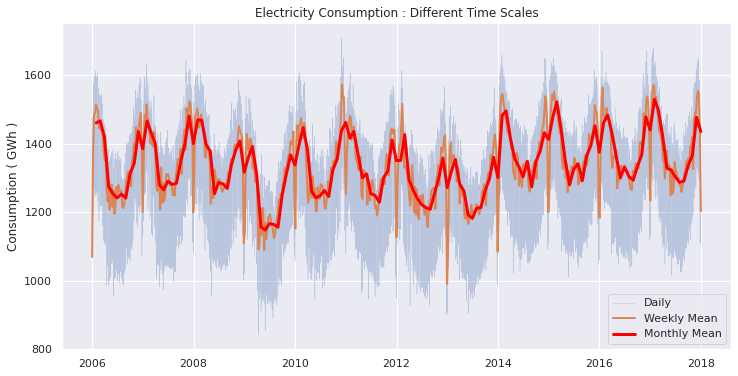

In [68]:
# Create weekly and monthly resampled series
# Comparing di!erent resampling frequencies

opsd_weekly = opsd_daily["Consumption"].resample("W").mean()
opsd_monthly = opsd_daily["Consumption"].resample("M").mean()

fig , ax = plt.subplots(figsize=(12, 6))

# Plot all three frequencies
ax.plot(opsd_daily["Consumption"] ,
alpha=0.3, label="Daily", linewidth=0.5)
ax.plot(opsd_weekly ,
label="Weekly Mean", linewidth=2)
ax.plot(opsd_monthly ,
label="Monthly Mean", linewidth=3, color="red")

ax.legend()
ax.set_ylabel("Consumption ( GWh )")
ax.set_title("Electricity Consumption : Different Time Scales")
plt.show()

 # Observations :
 # - Daily : Very noisy , hard to see trends
 # - Weekly : Smoother , shows weekly patterns
 # - Monthly : Very smooth , shows only long - term trends

# 9 Rolling Windows: Moving Calculations
### 9.1 What is a Rolling Window?
A rolling window is a small window that slides across your time series, computing a statistic for
each window. Unlike resampling, rolling windows:

• Overlap and ”roll” along the data

• Maintain the same frequency as the input

• Always include N observations per window

### 9.2 Computing Rolling Means
The rolling() method creates a rolling window aggregator

In [44]:
# Compute 7 - day rolling mean
opsd_7d = opsd_daily["Consumption"].rolling(window=7).mean()

# Display first 10 values
print (opsd_7d.head(10))
#
# 2006-01-01 NaN <-- first 6 values are NaN
# 2006-01-02 NaN <-- ( need full window )
# 2006-01-03 NaN
# 2006-01-04 NaN
# 2006-01-05 NaN
# 2006-01-06 NaN
# 2006-01-07 NaN
# 2006-01-08 1381.30 <-- first valid rolling mean
# 2006-01-09 1396.81
# 2006-01-10 1411.23

# Use center = True to label window at its midpoint
opsd_7d_centered = opsd_daily["Consumption"].rolling(window=7, center=True).mean()

Date
2006-01-01            NaN
2006-01-02            NaN
2006-01-03            NaN
2006-01-04            NaN
2006-01-05            NaN
2006-01-06            NaN
2006-01-07    1361.471429
2006-01-08    1381.300143
2006-01-09    1402.557571
2006-01-10    1421.754429
Freq: D, Name: Consumption, dtype: float64


### 9.3 Rolling Statistics Beyond Mean

In [72]:
# 7 - day rolling standard deviation ( volatility )
opsd_7d_std = opsd_daily["Consumption"].rolling(window=7).std()

# 30- day rolling min and max ( bands )
rolling_min = opsd_daily["Consumption"].rolling(window=30). min ()
rolling_max = opsd_daily["Consumption"].rolling(window=30). max ()

# 14- day rolling sum
rolling_sum = opsd_daily["Wind"].rolling(window=14).sum ()

### 9.4 Multiple Rolling Statistics at Once


In [73]:
rolling_stats = opsd_daily["Consumption"].rolling(window=7).agg([
"mean",
"std" ,
"min" ,
"max" 
])

print (rolling_stats.head(15))

                   mean         std       min       max
Date                                                   
2006-01-01          NaN         NaN       NaN       NaN
2006-01-02          NaN         NaN       NaN       NaN
2006-01-03          NaN         NaN       NaN       NaN
2006-01-04          NaN         NaN       NaN       NaN
2006-01-05          NaN         NaN       NaN       NaN
2006-01-06          NaN         NaN       NaN       NaN
2006-01-07  1361.471429  141.665075  1069.184  1477.131
2006-01-08  1381.300143   96.426015  1207.985  1477.131
2006-01-09  1402.557571  111.456172  1207.985  1529.323
2006-01-10  1421.754429  129.586726  1207.985  1576.911
2006-01-11  1438.891429  142.360371  1207.985  1577.176
2006-01-12  1449.769857  148.544578  1207.985  1577.176
2006-01-13  1469.994857  150.804010  1207.985  1577.176
2006-01-14  1478.517429  140.980419  1207.985  1577.176
2006-01-15  1486.730286  123.139484  1265.475  1577.176


### 9.5 Visualizing Rolling Windows

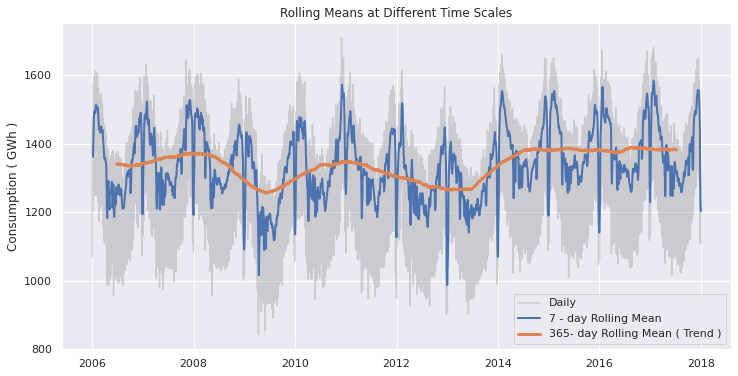

In [74]:
# Compute rolling means at different scales
opsd_7d = opsd_daily["Consumption"].rolling(window=7).mean()
opsd_365d = opsd_daily["Consumption"].rolling(
window=365,
center=True ,
min_periods=360
).mean()

fig , ax = plt.subplots(figsize=(12, 6))

# Plot daily data and rolling means
ax.plot(opsd_daily["Consumption"] ,
color="gray", alpha=0.3, label="Daily")
ax.plot(opsd_7d ,
label="7 - day Rolling Mean", linewidth=2)
ax.plot(opsd_365d ,
label="365- day Rolling Mean ( Trend )", linewidth=3)

ax.set_ylabel("Consumption ( GWh )")
ax.set_title("Rolling Means at Different Time Scales")
ax.legend()
plt.show()

In [75]:
# 7 - day rolling mean : Smooths out daily noise , reveals weekly patterns
# 365- day rolling mean : Smooths out seasonal patterns , shows long - term trend

# 10 Analyzing Trends in Time Series
### 10.1 What is a Trend?
A trend is a long-term, gradual change in the data (upward, downward, or flat). Trends are distinct
from:
    
• <b>Seasonality:</b> Repeating patterns (can be removed with di!erencing)
    
• <b> Noise: </b> Random fluctuations (can be smoothed with rolling means)
    
### 10.2 Identifying Trends with Long-Term Rolling Means
A rolling mean with a window equal to or larger than the seasonal period e!ectively removes seasonality while preserving the trend.

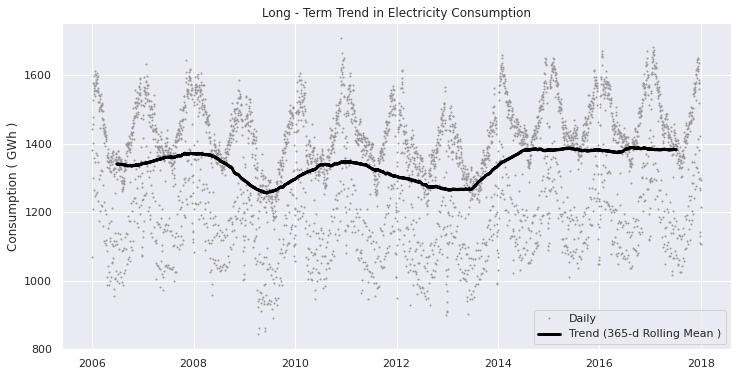

In [78]:
# 365- day rolling mean removes yearly seasonality
trend_consumption = opsd_daily["Consumption"].rolling(
window=365,
center=True ,
min_periods=360
).mean()

fig , ax = plt.subplots(figsize=(12, 6))

ax.plot(opsd_daily["Consumption"] ,
marker=".", markersize=2, color="0.6",
linestyle="None", label="Daily")
ax.plot(trend_consumption ,
color="black", linewidth=3, label="Trend (365-d Rolling Mean )")

ax.set_ylabel("Consumption ( GWh )")
ax.set_title("Long - Term Trend in Electricity Consumption")
ax.legend()
plt.show()

 # Observation : Overall consumption is relatively flat over 12 years
 # with dips around 2008-2009 ( financial crisis ) and 2012-2013

### 10.3 Analyzing Trends in Renewable Energy Production


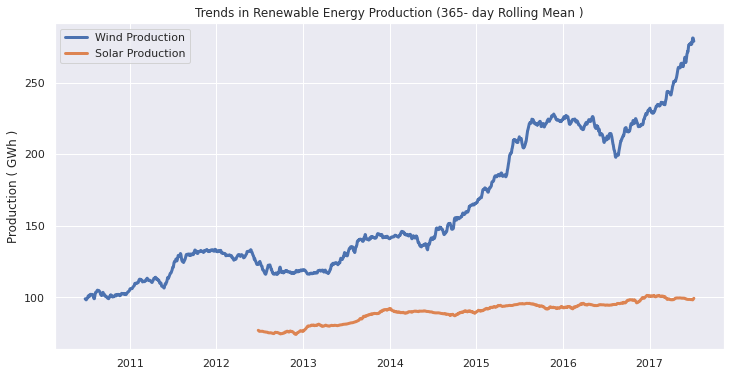

In [79]:
# Compute 365- day rolling means for renewables
trend_wind = opsd_daily["Wind"].rolling(365, center=True , min_periods =360).mean()
trend_solar = opsd_daily["Solar"].rolling(365, center=True , min_periods =360).mean()

fig , ax = plt.subplots(figsize=(12, 6))

ax.plot(trend_wind , label="Wind Production", linewidth=3)
ax.plot(trend_solar , label="Solar Production", linewidth=3)

ax.set_ylabel("Production ( GWh )")
ax.set_title("Trends in Renewable Energy Production (365- day Rolling Mean )")
ax.legend()
plt.show()

In [80]:
# Key findings :
# - Wind production shows strong upward trend ( Germany ’s energy transition )
# - Solar production shows modest upward trend
# - By 2017, renewables account for significant fraction of consumption

### 10.4 Quantifying Trend Growth

In [81]:
# Calculating year-over-year growth
# Annual aggregation
annual_wind = opsd_daily["Wind"].resample("Y") .sum ()
annual_solar = opsd_daily["Solar"].resample("Y") . sum ()
annual_consumption = opsd_daily["Consumption"].resample("Y") .sum ()

# Calculate annual growth rate
annual_wind_pct = annual_wind.pct_change() * 100
annual_solar_pct = annual_solar.pct_change() * 100

# Renewable share of consumption
renewable_share = (annual_wind + annual_solar) / annual_consumption

print (renewable_share.tail(3))
# 2015 0.222 (22.2% from wind and solar )
# 2016 0.221 (22.1%)
# 2017 0.275 (27.5%) <-- significant increase

Date
2015-12-31    0.222410
2016-12-31    0.220528
2017-12-31    0.274500
Freq: A-DEC, dtype: float64


# Summary 

### Summary and Best Practices
####  Key Concepts Review
1. Timestamp: Single point in time
2. DatetimeIndex: Index of multiple time points
3. Seasonality: Repeating patterns at regular intervals
4. Frequency: The spacing between observations (D, H, M, Y, etc.)
5. Resampling: Changing frequency (downsampling or upsampling)
6. Rolling Window: Sliding window for local statistics
7. Trend: Long-term gradual change, separate from seasonality
    
####  Best Practices Checklist
1. Load correctly: Use parse dates=True and index col when reading CSVs
2. Verify dtype: Always check that date columns are datetime64[ns]
3. Use DatetimeIndex: Essential for powerful time-based slicing
4. Specify format: For large datasets, provide explicit date format for 50x speed improvement
5. Slice with strings: Use .loc[’2017’], .loc[’2017-08’], etc.
6. Visualize first: Always plot your data before analysis
7. Choose appropriate frequency: Match your analysis goal (daily detail or monthly trend)
8. Use rolling windows: For smoothing and identifying local patterns
9. Document seasonality: Identify and account for repeating patterns
10. Extract long-term trends: Use rolling means larger than seasonal periods
    
#### Common Pitfalls to Avoid
1. Keeping date columns as strings (object dtype)
2. Using complex boolean masking instead of DatetimeIndex slicing
3. Ignoring missing data in aggregations
4. Confusing resampling with rolling windows
5. Analyzing non-stationary data without detrending
6. Forgetting to set min periods in rolling aggregations
7. Using same window size for di!erent seasonal periods

# Quick Reference: Common Operations


<Axes: xlabel='Date'>

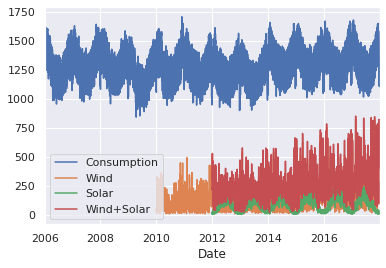

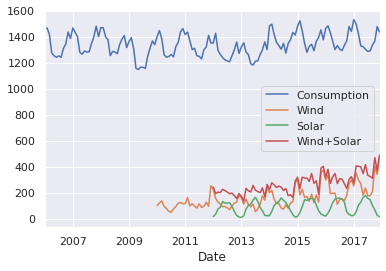

In [84]:
# Load and prepare
df = pd.read_csv("opsd_germany_daily.csv", index_col=0, parse_dates=True)

# Slicing
df.loc["2017"] # Entire year
df.loc["2017-01" :"2017-06"] # Date range
df.loc["2017-02"] # Entire month

# Resampling ( change frequency )
df.resample("W").mean() # Weekly mean
df.resample("M") .sum () # Monthly sum
df.resample("Q").agg([ "mean", "std"]) # Quarterly multi - stat

# Rolling windows ( same frequency )
df.rolling(7).mean() # 7 - period rolling mean
df.rolling(365, center=True).mean() # Centered annual window

# Extracting components
df.index.year
df.index.month
df.index.dayofweek
df.index.day_name()

# Visualization
df.plot()
df.resample("M").mean().plot()